<a href="https://www.kaggle.com/code/mustafabozka/naivebayesclassification-heartbeat-datasets?scriptVersionId=124357638" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
train =pd.read_csv("/kaggle/input/heartbeat/mitbih_train.csv")


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
9.779411554336547852e-01,87553.0,0.890359,0.240910,0.0,0.921922,0.991342,1.000000,1.0
9.264705777168273926e-01,87553.0,0.758158,0.221814,0.0,0.682482,0.826007,0.910506,1.0
6.813725233078002930e-01,87553.0,0.423969,0.227305,0.0,0.250965,0.429467,0.578767,1.0
2.450980395078659058e-01,87553.0,0.219104,0.206880,0.0,0.048458,0.165992,0.341727,1.0
1.544117629528045654e-01,87553.0,0.201127,0.177058,0.0,0.082329,0.147870,0.258993,1.0
...,...,...,...,...,...,...,...,...
0.000000000000000000e+00.84,87553.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
0.000000000000000000e+00.85,87553.0,0.003221,0.034790,0.0,0.000000,0.000000,0.000000,1.0
0.000000000000000000e+00.86,87553.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
0.000000000000000000e+00.87,87553.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


In [5]:
X_train=np.array(train)[:,:187]
y_train=np.array(train)[:,187]

In [6]:
X_train.shape

(87553, 187)

In [7]:
y_train.shape

(87553,)

In [8]:
test =pd.read_csv("/kaggle/input/heartbeat/mitbih_test.csv")
X_test=np.array(test)[:,:187]
y_test=np.array(test)[:,187]

In [9]:
X_test.shape

(21891, 187)

In [10]:
y_test.shape

(21891,)

In [11]:
from sklearn.naive_bayes import CategoricalNB
gnb = CategoricalNB()
gnb.fit(X_train, y_train)



CategoricalNB()

In [12]:
y_pred = gnb.predict(X_test)

y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm= confusion_matrix(y_test,y_pred)
index = ['No','S','V','F','Q'] 
columns = ['No','S','V','F','Q']   
cm_df = pd.DataFrame(cm,columns,index)                      


<AxesSubplot:>

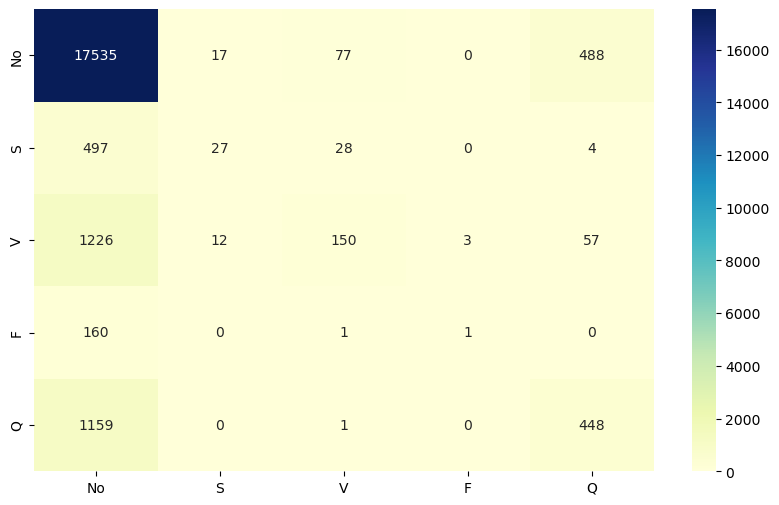

In [14]:
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True,fmt="d",cmap="YlGnBu")

In [15]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8296103421497419


In [16]:
print("Accuracy:",metrics.f1_score(y_test, y_pred,average="weighted" )) # average has to be one of (None, 'micro', 'macro', 'weighted', 'samples')

Accuracy: 0.7893229122548654
